# Twitter Sentiment Analysis with TF-IDF + PCA (improved) + Neural Network

<h3>Step 1: Import Libraries</h3><p>Import all necessary Python libraries required for data handling, preprocessing, modeling, and evaluation.</p>

In [2]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<h3>Step 2: Download Stopwords</h3><p>Download the English stopwords list from NLTK, used later to clean the text data.</p>

In [3]:

# Step 2: Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/webdew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Step 3: Load Data</h3><p>Load the raw Twitter sentiment dataset, keep only the sentiment labels and tweet texts.</p>


In [4]:

# Step 3: Load Data
data = pd.read_csv("/Users/webdew/Desktop/LSD Project/Twitter Sentiment Dataset/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
data = data[['target', 'text']]
data = data[data['target'].isin([0, 4])]
data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)
print("Data shape after loading:", data.shape)


Data shape after loading: (1600000, 2)


<h3>Step 4: Clean Text</h3><p>Preprocess the tweets by removing URLs, punctuation, converting to lowercase, and filtering stopwords.</p>

In [5]:

# Step 4: Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

data['clean_text'] = data['text'].apply(clean_text)
print("Sample cleaned texts:")
print(data['clean_text'].head())


Sample cleaned texts:
0    switchfoot awww thats bummer shoulda got david...
1    upset cant update facebook texting might cry r...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4             nationwideclass behaving im mad cant see
Name: clean_text, dtype: object


<h3>Step 5: TF-IDF Vectorization</h3><p>Convert the cleaned tweets into numerical feature vectors using TF-IDF representation.</p>

In [6]:

# Step 5: TF-IDF Vectorization
sample_size = 50000
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data_sample = data.iloc[:sample_size]

vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(data_sample['clean_text']).toarray()
y = data_sample['target'].values
print("TF-IDF feature matrix shape:", X_tfidf.shape)


TF-IDF feature matrix shape: (50000, 3000)


<h3>Step 6: PCA Dimensionality Reduction</h3><p>Reduce the TF-IDF feature dimensions while preserving 95% of the variance using Principal Component Analysis (PCA).</p>

PCA-reduced matrix shape: (50000, 2334)


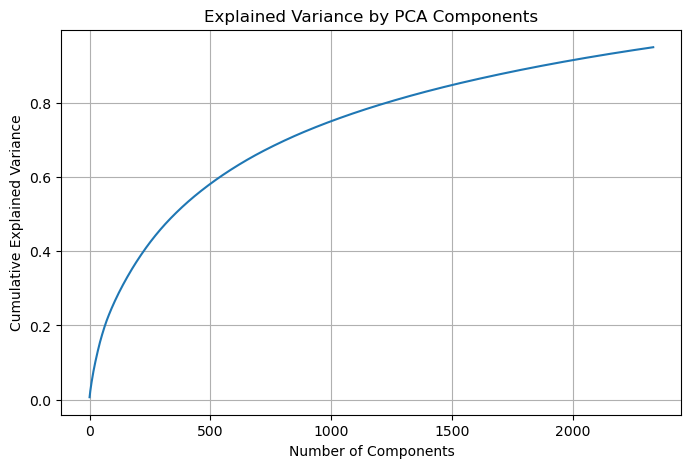

In [7]:

# Step 6: PCA (retain 95% explained variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_tfidf)
print("PCA-reduced matrix shape:", X_pca.shape)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


<h3>Step 7: Train/Test Split</h3><p>Split the dataset into training and testing sets, stratifying to maintain balanced labels.</p>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


## Section A - Naive Bayes & k-Nearest Neighbors (Name)

Please implement **both Naive Bayes and k-NN classifiers** using the PCA-transformed features (`X_pca`).  
You may test different values of `k` for k-NN.

**Required outputs:**
- Classification report for both models
- Confusion matrix for both models
- (Optional) A graph showing performance vs. different `k` values


In [30]:
# Naive Bayes implementation here


In [ ]:
# K-Nearest Neighbors implementation here

## Section B - Decision Tree & Random Forest (Nova)

Please implement both Decision Tree and Random Forest models using the PCA-transformed features.

**Required outputs:**
- Accuracy and F1 scores
- Feature importance plot (for trees)
- Confusion matrix


=== Decision Tree Results
Accuracy: 0.6333
F1 Score: 0.6364

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63      4997
           1       0.63      0.64      0.64      5003

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



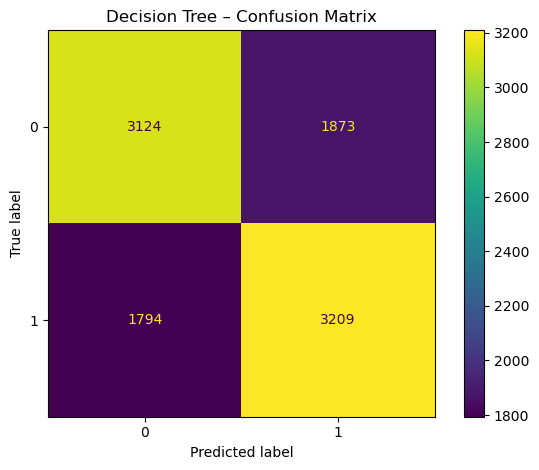

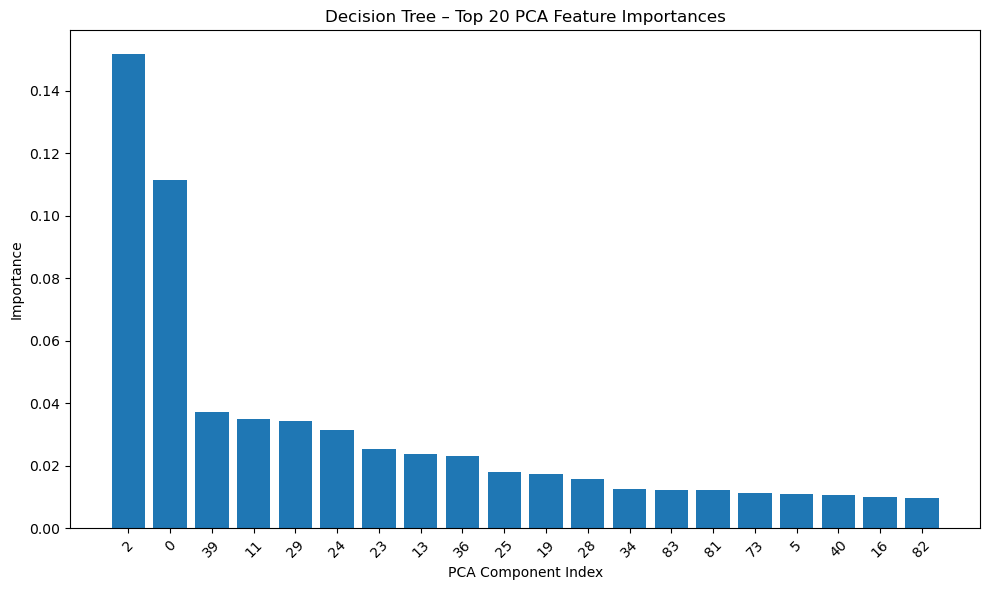

In [15]:
#Decision Tree Implementation Here
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# 1) PCA reduction to 100 components
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_tfidf)

# 2) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Downcast to float32 for speed
X_train = X_train.astype(np.float32)
X_test  = X_test.astype(np.float32)

# 4) Train Decision Tree with leaf constraint
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(X_train, y_train)

# 5) Predict & print metrics
y_pred = dt.predict(X_test)
print("=== Decision Tree Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6) Confusion matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Decision Tree – Confusion Matrix")
plt.tight_layout()
plt.show()

# 7) Top-20 feature importances
importances = dt.feature_importances_
top_idx = np.argsort(importances)[-20:][::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(20), importances[top_idx])
plt.xticks(range(20), top_idx, rotation=45)
plt.title("Decision Tree – Top 20 PCA Feature Importances")
plt.xlabel("PCA Component Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


=== Random Forest Results ===
Accuracy: 0.6968
F1 Score: 0.6981

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      4997
           1       0.70      0.70      0.70      5003

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



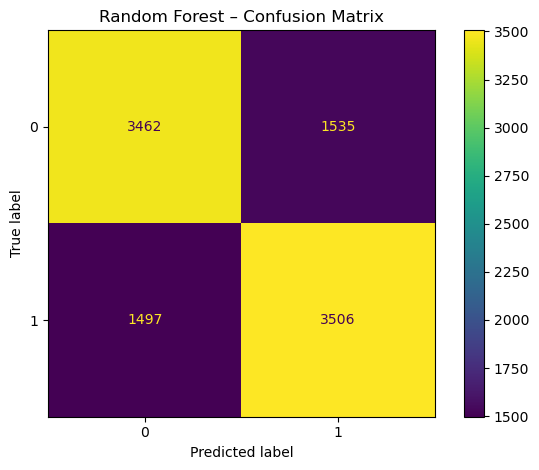

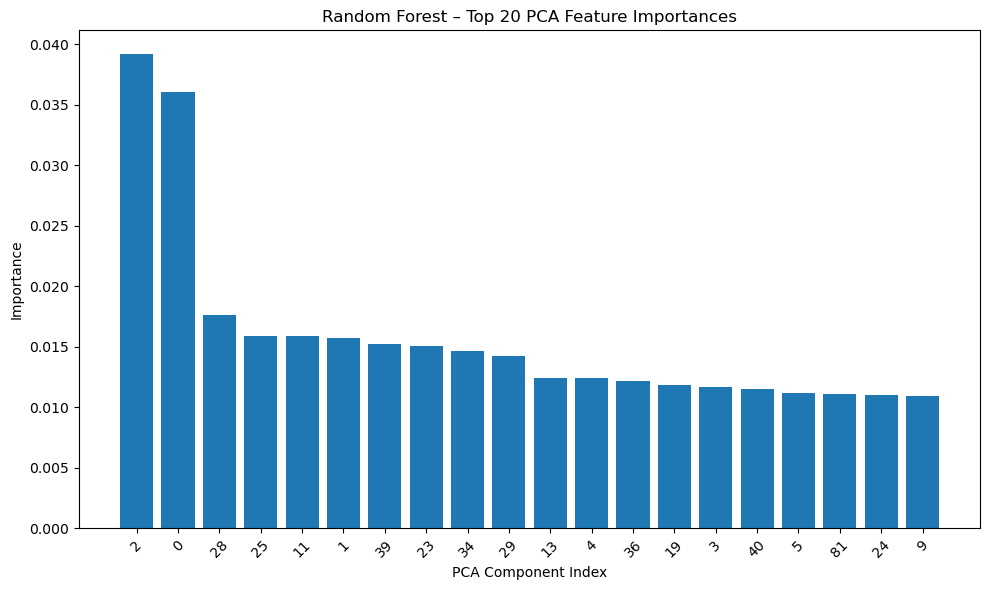

In [14]:
# Random Forest implementation here
# 1) Instantiate & train
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 2) Predict & print metrics
y_pred_rf = rf.predict(X_test)
print("=== Random Forest Results ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 3) Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest – Confusion Matrix")
plt.tight_layout()
plt.show()

# 4) Top-20 feature importances
importances_rf = rf.feature_importances_
top_idx_rf = np.argsort(importances_rf)[-20:][::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(20), importances_rf[top_idx_rf])
plt.xticks(range(20), top_idx_rf, rotation=45)
plt.title("Random Forest – Top 20 PCA Feature Importances")
plt.xlabel("PCA Component Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Section C - Logistic Regression (Name)

Please implement logistic regression using `X_pca`.  
Optionally, try adjusting the regularization strength (parameter `C`).

**Required outputs:**
- Classification report
- Confusion matrix
- (Optional) Coefficient interpretation


In [ ]:
# Regression implementation here

In [ ]:
# Logistic Regression implementation here

## Section D - MLP & Deep Neural Network (Jiayi)

This is your section to implement:
- A shallow MLP (as baseline)
- A deep neural network with dropout and L2 regularization

**Required outputs:**
- Accuracy and F1 score
- Loss and accuracy curves over epochs
- Confusion matrix


In [ ]:
# MLP implementation here

In [ ]:
# DNN implementation here